In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

fname = 'coffee-resized.jpg'
!wget https://onlinejpgtools.com/images/examples-onlinejpgtools/coffee-resized.jpg

In [0]:
from keras.preprocessing import image
from imgaug import augmenters as iaa
import numpy as np

img = image.load_img(fname, target_size=(128, 128))
img = image.img_to_array(img)

images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
seq = iaa.Sequential([iaa.Fliplr(0.5), iaa.GaussianBlur((0, 3.0))])

# show an image with 8*8 augmented versions of image 0
seq.show_grid(img, cols=8, rows=8)

# Show an image with 8*8 augmented versions of image 0 and 8*8 augmented
# versions of image 1. The identical augmentations will be applied to
# image 0 and 1.
# seq.show_grid([images[0], images[1]], cols=8, rows=8)

In [0]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import imageio

ia.seed(1)

images = np.array(
    [imageio.imread(fname) for _ in range(1)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq.augment_images(images)

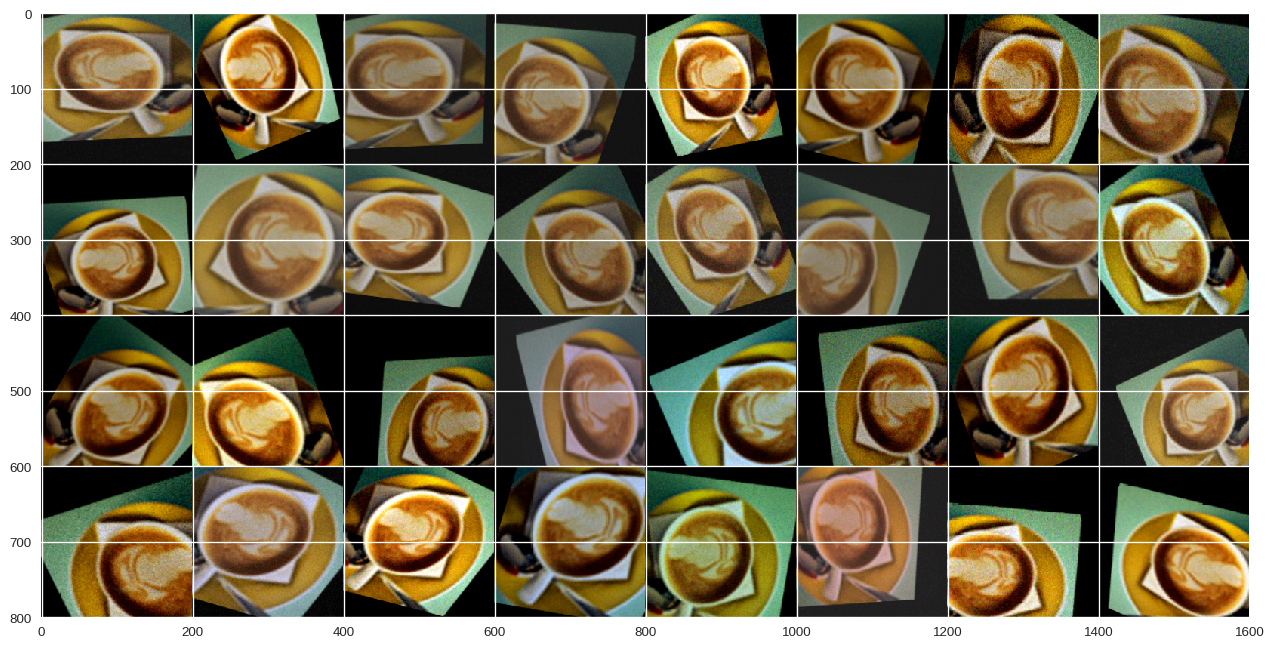

In [70]:
seq.show_grid(images_aug, cols=8, rows=4)